# 507 M6

In [1]:
import numpy as no
import pandas as pd
import pymysql as mysql
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
conn=mysql.connect(host='localhost',port=int(3306),user='root',passwd='****',db='gravity_books')

In [3]:
tableNames = pd.read_sql("""SHOW TABLES""", conn) 
tableNames

,Tables_in_gravity_books
0,address
1,address_status
2,author
3,book
4,book_author
5,book_language
6,country
7,cust_order
8,customer
9,customer_address


# Extrac data from csv file downloaded from the World Bank

In [4]:
population = pd.read_csv('/Users/UE/Desktop/population.csv')
income = pd.read_csv('/Users/UE/Desktop/income.csv')

In [5]:
pd.read_sql_query("""

DROP TABLE population;

""" , con = conn) 

TypeError: 'NoneType' object is not iterable

In [6]:
pd.read_sql_query("""

create TABLE population (
countrycode varchar(5),
countryname varchar(100),
population2020 bigint,
population2021 bigint)

""" , con = conn) 

TypeError: 'NoneType' object is not iterable

In [7]:
cursor = conn.cursor()
for i,row in population.iterrows():
            sql = "INSERT INTO population VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()

In [8]:
pop = pd.read_sql_query("""

SELECT * FROM population

""" , con = conn)
pop

,countrycode,countryname,population2020,population2021
0,ABW,Aruba,106585,106537
1,AFE,Africa Eastern and Southern,685112705,702976832
2,AFG,Afghanistan,38972230,40099462
3,AFW,Africa Western and Central,466189102,478185907
4,AGO,Angola,33428486,34503774
...,...,...,...,...
260,XKX,Kosovo,1790133,1786038
261,YEM,"Yemen, Rep.",32284046,32981641
262,ZAF,South Africa,58801927,59392255
263,ZMB,Zambia,18927715,19473125


In [9]:
pop.dtypes

countrycode       object
countryname       object
population2020     int64
population2021     int64
dtype: object

In [10]:
income = income.dropna()
drop_income = pd.read_sql_query("""

DROP TABLE income;

""" , con = conn) 

TypeError: 'NoneType' object is not iterable

In [11]:
pd.read_sql_query("""

create TABLE income (
countrycode varchar(5),
region varchar(255),
incomegroup varchar(255),
countryname varchar(100))

""" , con = conn) 

TypeError: 'NoneType' object is not iterable

In [12]:
cursor = conn.cursor()
for i,row in income.iterrows():
            sql = "INSERT INTO income VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()

In [13]:
income_table = pd.read_sql_query("""

SELECT * FROM income

""" , con = conn)

income_table 

,countrycode,region,incomegroup,countryname
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
211,XKX,Europe & Central Asia,Upper middle income,Kosovo
212,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
213,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
214,ZMB,Sub-Saharan Africa,Low income,Zambia


In [14]:
income_table.dtypes

countrycode    object
region         object
incomegroup    object
countryname    object
dtype: object

In [15]:
pd.read_sql_query("""

SELECT * FROM country

""" , con = conn)

,country_id,country_name
0,1,Afghanistan
1,2,Netherlands Antilles
2,3,Albania
3,4,Algeria
4,5,Andorra
...,...,...
227,228,Yugoslavia
228,229,Zambia
229,230,Zimbabwe
230,231,Singapore


In [16]:
country_income = pd.read_sql_query("""

SELECT c.country_name, i.incomegroup
FROM country c
INNER JOIN income i
ON c.country_name = i.countryname

""" , con = conn)
country_income

,country_name,incomegroup
0,Afghanistan,Low income
1,Albania,Upper middle income
2,Algeria,Lower middle income
3,Andorra,High income
4,Angola,Lower middle income
...,...,...
170,Vietnam,Lower middle income
171,Zambia,Low income
172,Zimbabwe,Lower middle income
173,Singapore,High income


In [17]:
country_pop = pd.read_sql_query("""

SELECT c.country_name, p.population2020, p.population2021,((p.population2021 - p.population2020)/p.population2020) * 100 AS Pop_Changes_Percentage
FROM country c
INNER JOIN population p
ON c.country_name = p.countryname
""" , con = conn)

country_pop

,country_name,population2020,population2021,Pop_Changes_Percentage
0,Aruba,106585,106537,-0.0450
1,Afghanistan,38972230,40099462,2.8924
2,Angola,33428486,34503774,3.2167
3,Albania,2837849,2811666,-0.9226
4,Andorra,77700,79034,1.7169
...,...,...,...,...
170,Samoa,214929,218764,1.7843
171,Kosovo,1790133,1786038,-0.2288
172,South Africa,58801927,59392255,1.0039
173,Zambia,18927715,19473125,2.8815


# Transform the order_date column to seperate Year and Month Column

In [18]:
Sold_num = pd.read_sql_query("""

SELECT YEAR(order_date) AS Year, MONTH(order_date) AS Month, COUNT(*) AS num_books
FROM cust_order
GROUP BY Year, Month;

""" , con = conn)

Sold_num


,Year,Month,num_books
0,2023,1,212
1,2020,3,218
2,2022,2,200
3,2021,7,204
4,2020,9,206
5,2021,6,213
6,2022,11,213
7,2021,3,214
8,2022,10,215
9,2023,2,34


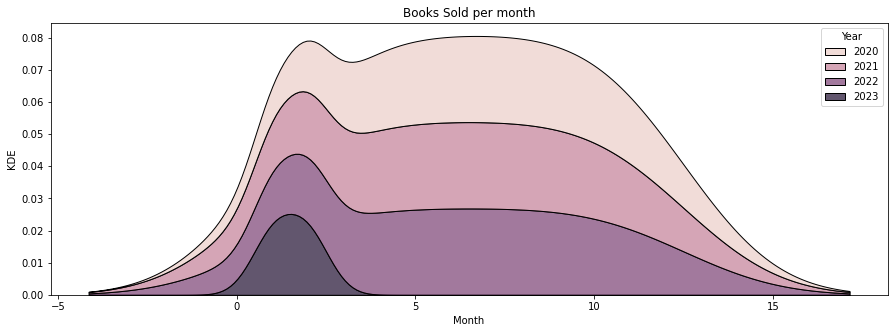

In [19]:
plt.figure(figsize = (15,5))
sns.kdeplot(data = Sold_num,x='Month', hue = 'Year', multiple = 'stack')
plt.xlabel("Month")
plt.ylabel("KDE")
plt.title("Books Sold per month");

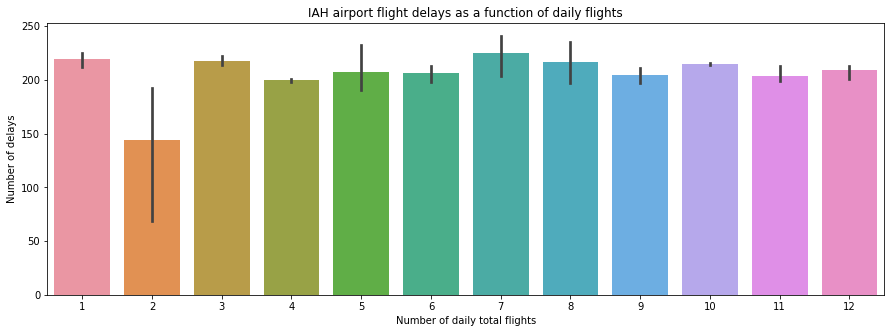

In [20]:
plt.figure(figsize = (15,5))
sns.barplot(data = Sold_num,y ='num_books',x = 'Month')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("IAH airport flight delays as a function of daily flights");

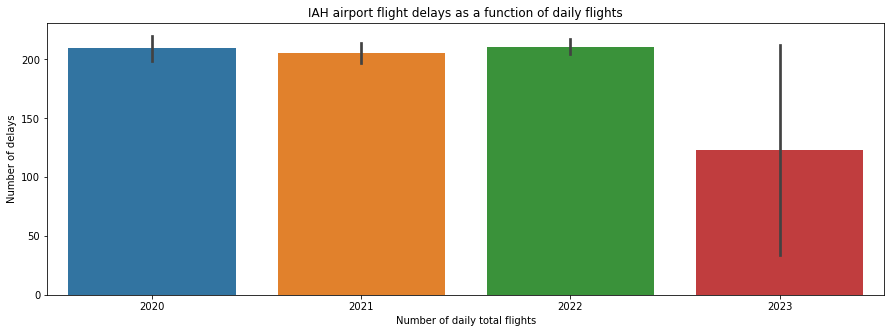

In [21]:
plt.figure(figsize = (15,5))
sns.barplot(data = Sold_num,y = 'num_books',x = 'Year')
plt.xlabel('Number of daily total flights')
plt.ylabel("Number of delays")
plt.title("IAH airport flight delays as a function of daily flights");

In [22]:
pd.read_sql_query("""

SHOW TABLES

#DROP VIEW join20;
#DROP VIEW join21;

""" , con = conn)


,Tables_in_gravity_books
0,address
1,address_status
2,author
3,book
4,book_author
5,book_language
6,country
7,cust_order
8,customer
9,customer_address


In [23]:
pd.read_sql_query("""

CREATE VIEW join20
AS
SELECT c.country_name, YEAR(co.order_date) AS YEAR, COUNT(*) AS books2020
FROM cust_order co
INNER JOIN address a
ON co.dest_address_id = a.address_id
INNER JOIN country c
ON a.country_id = c.country_id
GROUP BY c.country_name, YEAR(co.order_date)
HAVING YEAR = 2020;


""" , con = conn)

DatabaseError: Execution failed on sql '

CREATE VIEW join20
AS
SELECT c.country_name, YEAR(co.order_date) AS YEAR, COUNT(*) AS books2020
FROM cust_order co
INNER JOIN address a
ON co.dest_address_id = a.address_id
INNER JOIN country c
ON a.country_id = c.country_id
GROUP BY c.country_name, YEAR(co.order_date)
HAVING YEAR = 2020;


': (1050, "Table 'join20' already exists")

In [27]:
pd.read_sql_query("""

CREATE VIEW join21
AS
SELECT c.country_name, YEAR(co.order_date) AS YEAR, COUNT(*) AS books2021
FROM cust_order co
INNER JOIN address a
ON co.dest_address_id = a.address_id
INNER JOIN country c
ON a.country_id = c.country_id
GROUP BY c.country_name, YEAR(co.order_date)
HAVING YEAR = 2021;

""" , con = conn)

DatabaseError: Execution failed on sql '

CREATE VIEW join21
AS
SELECT c.country_name, YEAR(co.order_date) AS YEAR, COUNT(*) AS books2021
FROM cust_order co
INNER JOIN address a
ON co.dest_address_id = a.address_id
INNER JOIN country c
ON a.country_id = c.country_id
GROUP BY c.country_name, YEAR(co.order_date)
HAVING YEAR = 2021;

': (1050, "Table 'join21' already exists")

In [28]:
books2020 = pd.read_sql_query("""

SELECT join20.country_name, join20.books2020, p.population2020, join21.books2021, p.population2021, i.incomegroup
FROM join20 
INNER JOIN join21
ON join20.country_name = join21.country_name
INNER JOIN population p
ON join20.country_name = p.countryname
INNER JOIN income i
ON join20.country_name = i.countryname
ORDER BY books2020 DESC
LIMIT 30;

""" , con = conn)

books2020

,country_name,books2020,population2020,books2021,population2021,incomegroup
0,China,384,1411100000,376,1412360000,Upper middle income
1,Indonesia,292,271857970,338,273753191,Lower middle income
2,Philippines,119,112190977,134,113880328,Lower middle income
3,Poland,104,37899070,91,37747124,High income
4,Brazil,84,213196304,101,214326223,Upper middle income
5,France,76,67571107,99,67749632,High income
6,Portugal,54,10297081,69,10325147,High income
7,Peru,51,33304756,67,33715471,Upper middle income
8,Sweden,40,10353442,44,10415811,High income
9,Japan,40,126261000,34,125681593,High income


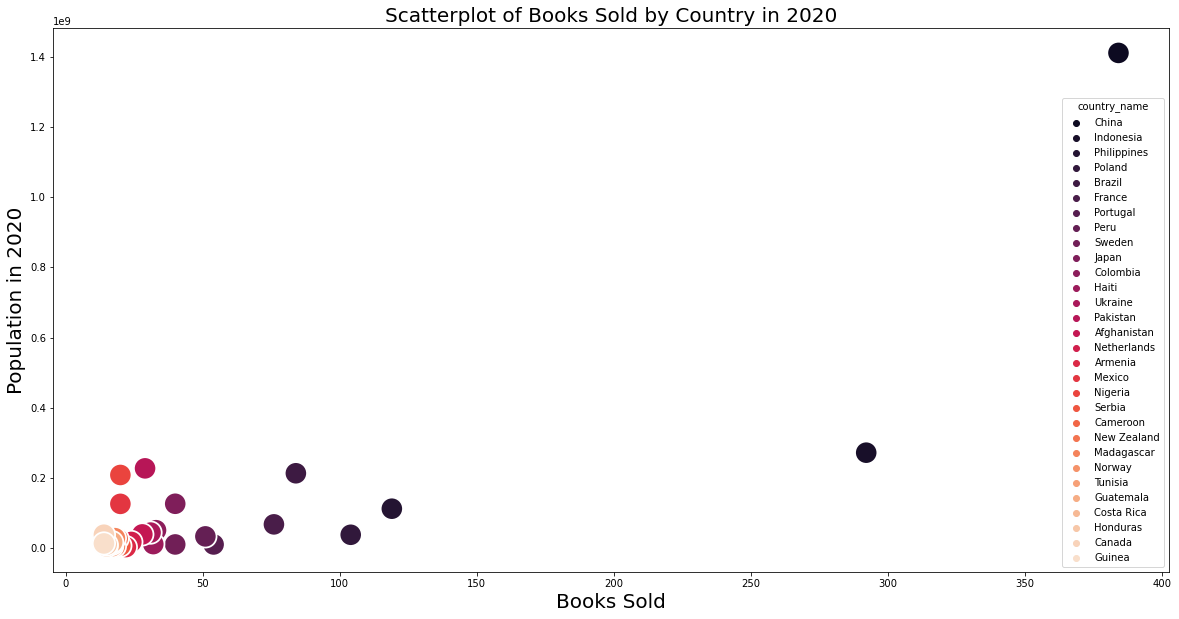

In [34]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = books2020,x ='books2020',y ='population2020',hue ='country_name', palette='rocket', s = 500)
plt.xlabel('Books Sold',fontsize = 20)
plt.ylabel("Population in 2020", fontsize = 20)
plt.title("Scatterplot of Books Sold by Country in 2020", fontsize = 20);

In [30]:
books2021 = pd.read_sql_query("""

SELECT join20.country_name, join20.books2020, p.population2020, join21.books2021, p.population2021, i.incomegroup
FROM join20 
INNER JOIN join21
ON join20.country_name = join21.country_name
INNER JOIN population p
ON join20.country_name = p.countryname
INNER JOIN income i
ON join20.country_name = i.countryname
ORDER BY books2021 DESC
LIMIT 30;

""" , con = conn)

books2021

,country_name,books2020,population2020,books2021,population2021,incomegroup
0,China,384,1411100000,376,1412360000,Upper middle income
1,Indonesia,292,271857970,338,273753191,Lower middle income
2,Philippines,119,112190977,134,113880328,Lower middle income
3,Brazil,84,213196304,101,214326223,Upper middle income
4,France,76,67571107,99,67749632,High income
5,Poland,104,37899070,91,37747124,High income
6,Portugal,54,10297081,69,10325147,High income
7,Peru,51,33304756,67,33715471,Upper middle income
8,Sweden,40,10353442,44,10415811,High income
9,Ukraine,31,44132049,42,43792855,Lower middle income


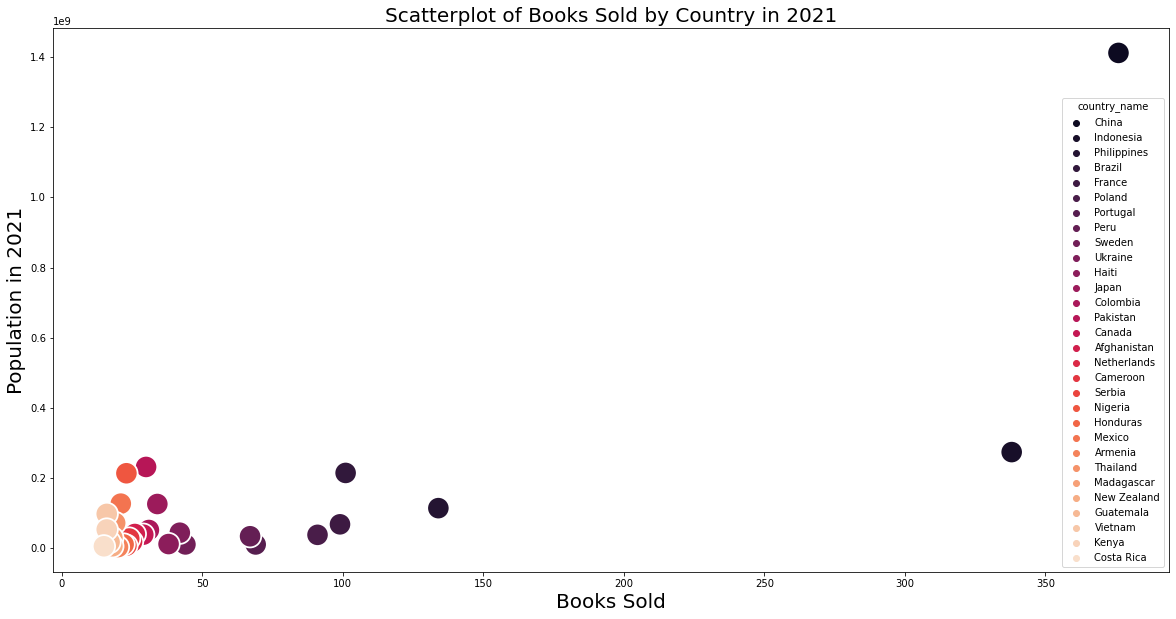

In [31]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = books2021,x ='books2021',y ='population2021',hue ='country_name',palette='rocket', s = 500)
plt.xlabel('Books Sold', fontsize = 20)
plt.ylabel("Population in 2021", fontsize = 20)
plt.title("Scatterplot of Books Sold by Country in 2021",fontsize = 20);

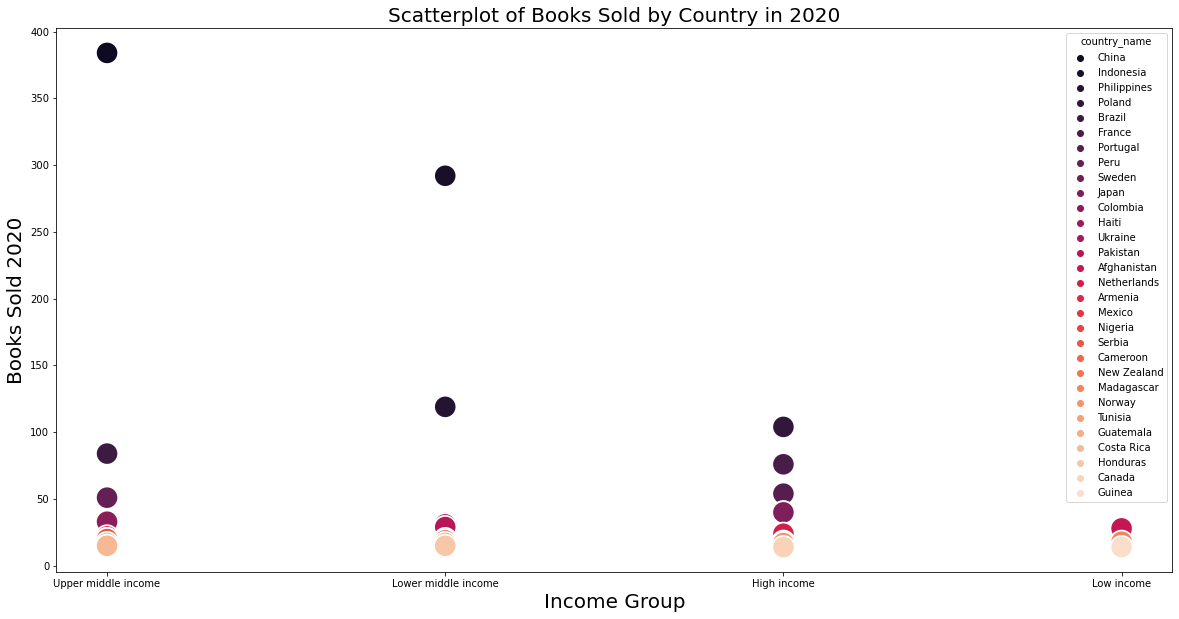

In [32]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = books2020,x ='incomegroup',y ='books2020',hue ='country_name',palette='rocket', s = 500)
plt.xlabel('Income Group', fontsize = 20)
plt.ylabel("Books Sold 2020", fontsize = 20)
plt.title("Scatterplot of Books Sold by Country in 2020",fontsize = 20);

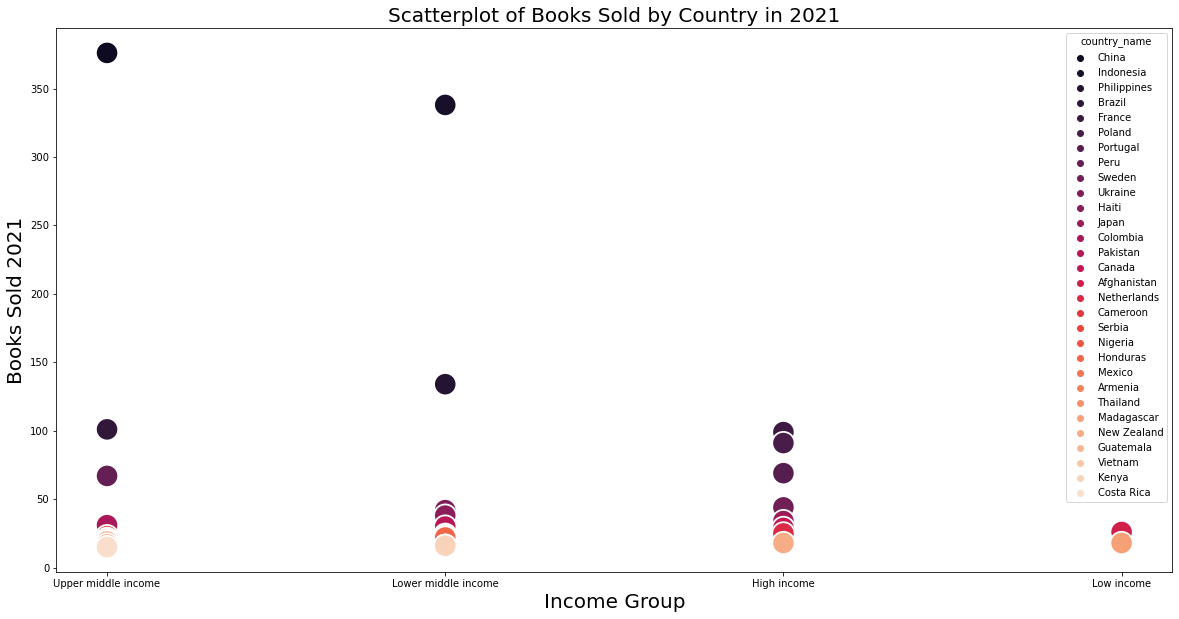

In [33]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = books2021,x ='incomegroup',y ='books2021',hue ='country_name',palette='rocket', s = 500)
plt.xlabel('Income Group', fontsize = 20)
plt.ylabel("Books Sold 2021", fontsize = 20)
plt.title("Scatterplot of Books Sold by Country in 2021",fontsize = 20);